In [2]:
import re

import pandas as pd
import glob
import matplotlib.pyplot as plt
import math
import numpy as np

In [3]:
# Reads results csv files into df
def read_csv(path):
    csv_files = glob.glob(path + "/*.csv")
    df_list = (pd.read_csv(file) for file in csv_files)
    full_df = pd.concat(df_list, ignore_index=True)
    full_df.columns = [c.replace(' ', '_') for c in full_df.columns]
    return full_df

### Data analysis

We want to find the class probabilities and compare these to the NN predictions

Antigens: 4 major
Max age: 5
Max lead time: 3

25 episodes

In [33]:
# We want to find the total class probabilities over all episodes

path = 'C:/Users/evani/OneDrive/AI leiden/Sanquin/NN training data/NN training data/reg_ABDCcEeKkFyaFybJkaJkbMNSs/5_3/q_matrices/'

q_m_files = glob.glob(path + "/*.pickle")
# Total of 25 episodes and 13 (?) files per episode
# Add all requests together
for i in range((25 * 13) - 1):
    file_1 = np.load(q_m_files[i], allow_pickle=True)
    file_2 = np.load(q_m_files[i + 1], allow_pickle=True)
    q_m = file_1.sum(axis=0) + file_2.sum(axis=0)
    total = len(file_1) + len(file_2)

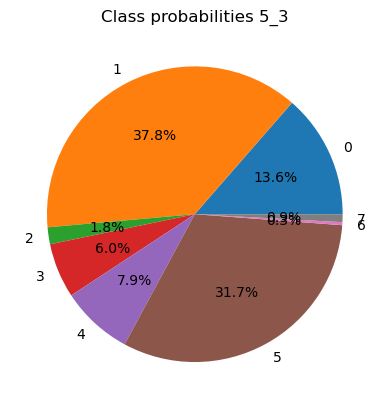

In [69]:
labels = [0, 1, 2, 3, 4, 5, 6, 7]
plt.pie(q_m, labels=labels, autopct='%1.1f%%')
plt.title("Class probabilities 5_3")
plt.show()

Above, we see that class 1 (37.8%) and class 5 (31.7%) are the most common classes in the target data.

### Kickstart architecture
Generated data for 25 episodes. Max age = 5 and lead time = 3.
Input = 72.
Output = 8.

#### Model
```
input -> [21, relu] -> [39, relu] -> [103, relu] -> output
dropout = [0.44] -> [0.36] -> [0.26]
```

Learning rate = 0.000145

Random seed = 1

In [30]:
seed1 = r"C:/Users/evani/OneDrive/AI leiden/Sanquin/Results/kickstart/[21, 39, 103]_[0.44, 0.36, 0.26]_a0.000145/results_kickstart/1/loss_1.csv"

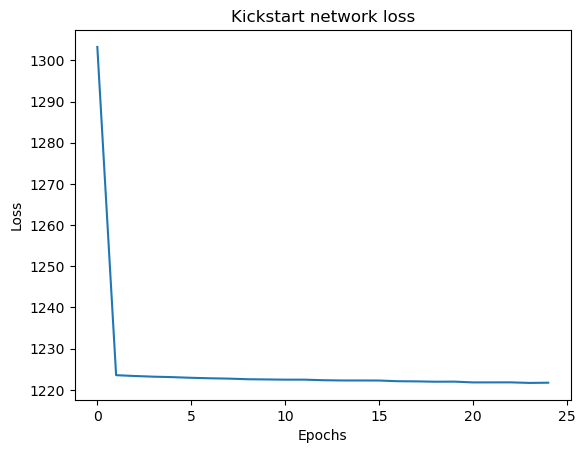

In [35]:
df1 = pd.read_csv(seed1)
plt.title("Kickstart network loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(df1)

##### Observations

Loss goes down, very slowly.
Will increase learning rate to 0.001. Increase epochs to 50. Also verify accuracy of highest Q-value.

### New architecture and longer training time

59 -> 105 -> 109
lr = 0.00044

epochs: 1000

Massively increased training time

In [58]:
seed10 = r'results/kickstart/10/loss_1.csv'

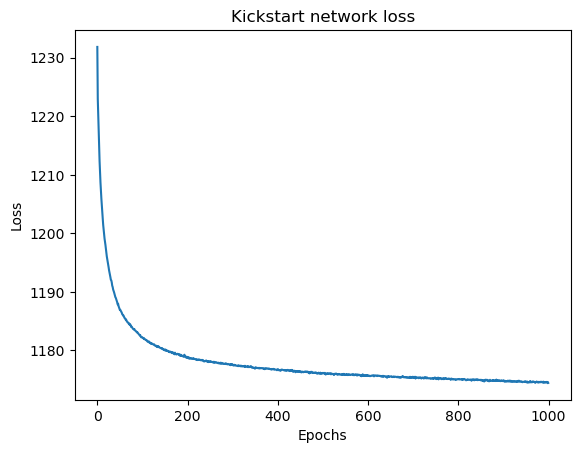

In [59]:
df10 = pd.read_csv(seed10)
plt.title("Kickstart network loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(df10)

### Test results

Tested the resulting model from the above described architecture.

In [18]:
test_path = 'results/test/[58, 105, 109]_5_3.csv'
test_df = pd.read_csv(test_path, index_col=0)
test_arr = test_df.to_numpy()

In [129]:
# Predicted classes counts
unique, counts = np.unique(test_arr[:, 1], return_counts=True)
counts

array([   716, 237063,      2,     48,  47049], dtype=int64)

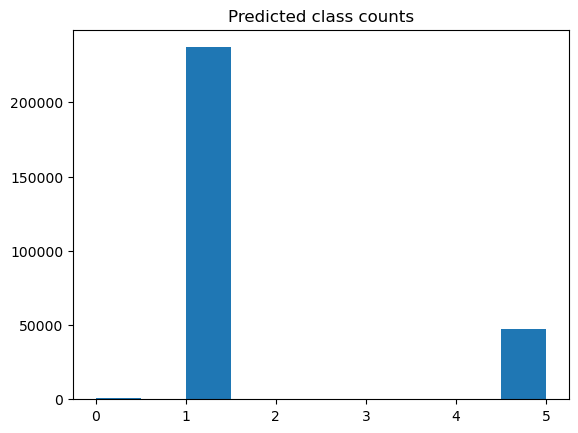

In [124]:
np.histogram(test_arr[:, 1])
plt.hist(test_arr[:, 1])
plt.title('Predicted class counts')
plt.show()

In [19]:
from sklearn.metrics import classification_report

labels = ['0', '1', '2', '3', '4', '5', '6', '7']
print(classification_report(test_arr[:, 0], test_arr[:, 1], target_names=labels, zero_division=0.0, digits=3))

              precision    recall  f1-score   support

           0      0.074     0.001     0.002     41768
           1      0.403     0.904     0.557    105573
           2      0.000     0.000     0.000      4840
           3      0.000     0.000     0.000     16935
           4      0.083     0.000     0.000     22174
           5      0.524     0.274     0.360     90003
           6      0.000     0.000     0.000      1129
           7      0.000     0.000     0.000      2456

    accuracy                          0.422    284878
   macro avg      0.135     0.147     0.115    284878
weighted avg      0.332     0.422     0.320    284878



### 1_1 Data analysis

Analyse target classes in the 1_1 dataset.
25 episodes
4 major antigens

In [25]:
# We want to find the total class probabilities over all episodes

path = 'C:/Users/evani/OneDrive/AI leiden/Sanquin/NN training data/NN training data/reg_ABDCcEeKkFyaFybJkaJkbMNSs/1_1/q_matrices/'

q_m_files = glob.glob(path + "/*.pickle")
# Total of 25 episodes and 13 (?) files per episode
# Add all requests together
for i in range((25 * 13) - 1):
    file_1 = np.load(q_m_files[i], allow_pickle=True)
file_2 = np.load(q_m_files[i + 1], allow_pickle=True)
q_m = file_1.sum(axis=0) + file_2.sum(axis=0)
total = len(file_1) + len(file_2)

In [28]:
1 / (q_m / total)

array([  7.90325765,   2.70655849,  43.27567568,  17.18025751,
        11.68759124,   3.05223027, 296.51851852, 163.3877551 ])

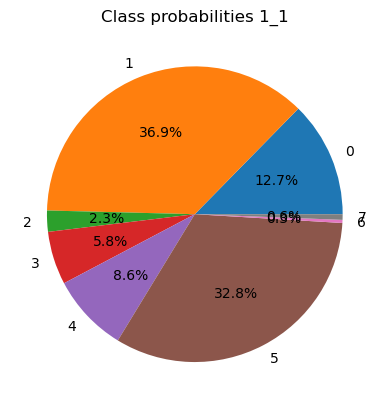

In [241]:
labels = [0, 1, 2, 3, 4, 5, 6, 7]
plt.pie(q_m, labels=labels, autopct='%1.1f%%')
plt.title("Class probabilities 1_1")
plt.show()

### 1_1 Kickstart test

Model: 64 -> 128 -> 64
Input: 24 * 1

Only 4 major antigens and 1/1 max age and lead time

In [221]:
with open('train_3_9.out', 'r') as f2:
    data = f2.read()
losses = re.findall("\d+\,*\d+\.\d+", data)
losses = [float(i) for i in losses]

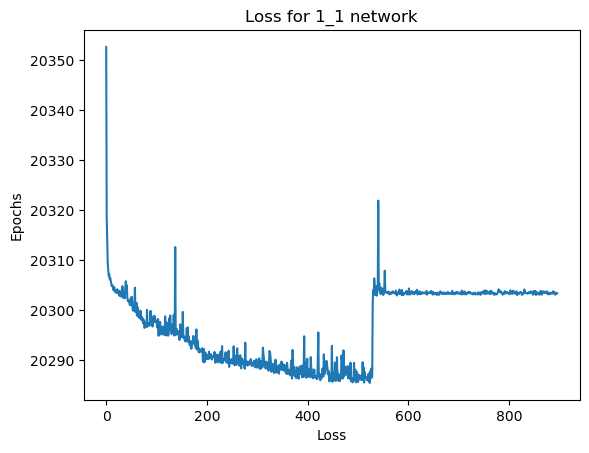

In [222]:
plt.plot(losses)
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.title("Loss for 1_1 network")
plt.show()

At around 500 epochs we can see the network deviating from the local minimum it was in.

In [6]:
path_1_1 = 'results/test/[64_128_64]_1_1.csv'
test_1_1 = pd.read_csv(path_1_1, index_col=0)
array_1_1 = test_1_1.to_numpy()

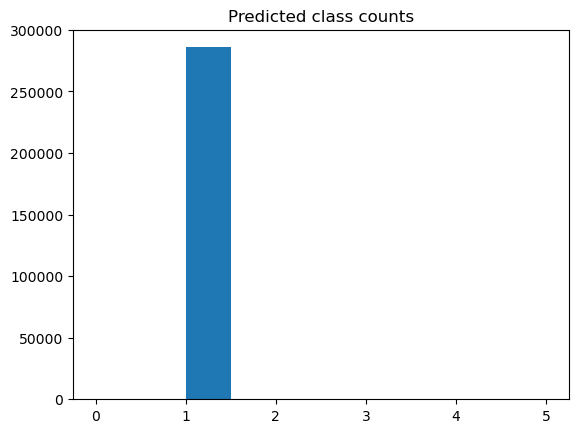

In [21]:
# Predicted classes counts
unique, counts = np.unique(array_1_1[:, 1], return_counts=True)
np.histogram(array_1_1[:, 1])
plt.hist(array_1_1[:, 1])
plt.title('Predicted class counts')
plt.show()

In [16]:
from sklearn.metrics import classification_report

labels = ['0', '1', '2', '3', '4', '5', '6', '7']
print(classification_report(array_1_1[:, 0], array_1_1[:, 1], target_names=labels, zero_division=0.0, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.000     0.000     35950
           1      0.365     1.000     0.535    104288
           2      0.000     0.000     0.000      6124
           3      0.000     0.000     0.000     17558
           4      0.000     0.000     0.000     25392
           5      0.500     0.000     0.000     93716
           6      0.000     0.000     0.000       962
           7      0.000     0.000     0.000      1817

    accuracy                          0.365    285807
   macro avg      0.233     0.125     0.067    285807
weighted avg      0.423     0.365     0.195    285807



Here, class 1 is predicted almost exclusively.Curiously, 5 is predicted much less.Even though the balance between 1 and 5 is roughly the same as in the 5_3 dataset.

### 1_1 With normalization

Kickstart on the 1_1 data with:

64 -> 128 -> 128 -> 64 and lr: 0.001

Data normalized per blood group per inventory/request.

Seed: 20.

In [4]:
test_path = 'C:/Users/evani/OneDrive/AI leiden/Sanquin/RL_matching-main/results/test/s20_[64_128_128__64]_1_1.csv'
test_df = pd.read_csv(test_path, index_col=0)
test_arr = test_df.to_numpy()

In [15]:
# Accuracy
(test_arr[:, 0] == test_arr[:, 1]).sum() / len(test_arr) * 100

0.6455405221005784

### New network + weighted sampler

512 -> 256 -> 128 -> 64

1d batchnorm every layer. Also dropout (0.2), after layer 1.

Included weighted sampler: 1 / class counts

Seed set at 4

In [42]:
path = 'C:/Users/evani/OneDrive/AI leiden/Sanquin/Results/kickstart/[512, 256, 128, 64]_a0.001_s4'

train = path + '/train_4.csv'
val = path + '/val_4.csv'

In [43]:
train_df = pd.read_csv(train)
val_df = pd.read_csv(val)

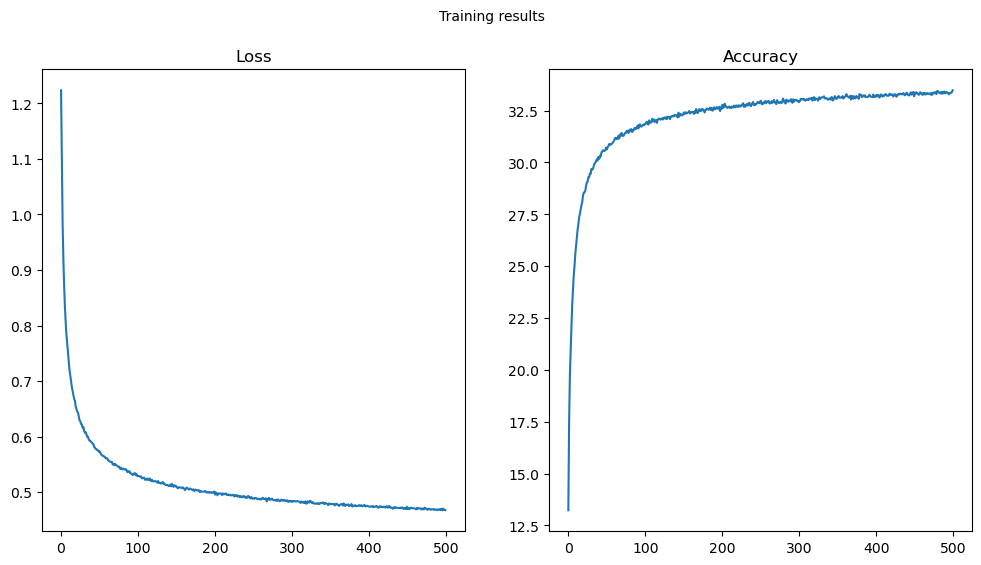

In [38]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(train_df["loss"])
ax1.title.set_text('Loss')

ax2.plot(train_df["accuracy"])
ax2.title.set_text('Accuracy')

f.suptitle("Training results", fontsize=10)

plt.show()

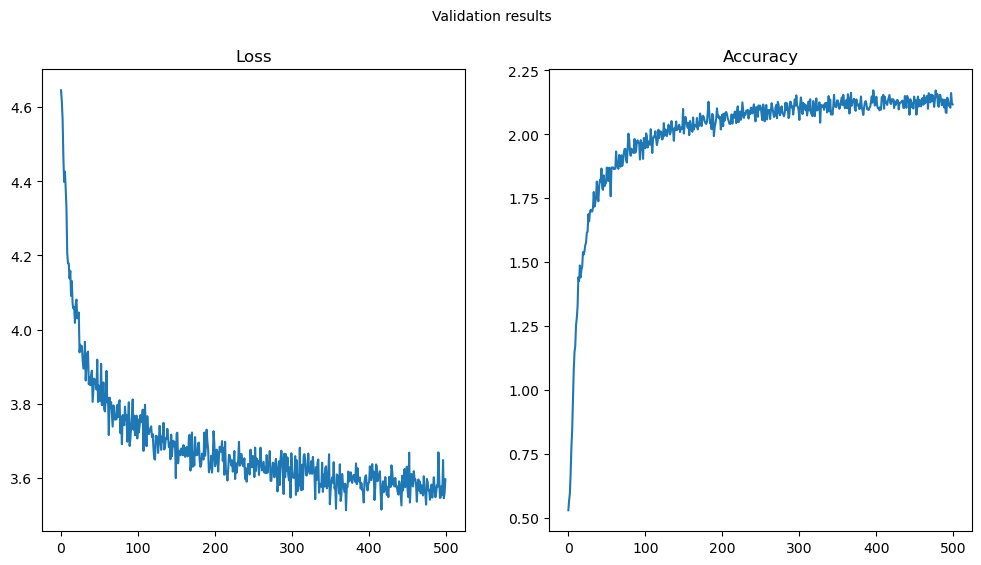

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(val_df["loss"])
ax1.title.set_text('Loss')

ax2.plot(val_df["accuracy"])
ax2.title.set_text('Accuracy')

f.suptitle("Validation results", fontsize=10)

plt.show()

### What does the NN actually predict?

To find out what is going on, let's print the output of the NN at some random points

In [301]:
import torch
import torch.nn as nn

In [308]:
def define_model():
    layers = []

    in_features = 24
    output = 8
    arch = [64, 128, 64]
    for i in range(len(arch)):
        out_features = arch[i]
        act = nn.ReLU()
        linear = nn.Linear(in_features, out_features)
        layers += (linear, act)
        in_features = out_features
    layers.append(nn.Linear(in_features, output))

    return nn.Sequential(*layers)

In [314]:
# Get lowest epoch loss to find out which model works best
losses.index(min(losses))

523

In [322]:
# Load weights from epoch 520
model = define_model()
model.load_state_dict(torch.load(
    r"C:/Users/evani/OneDrive/AI leiden/Sanquin/Results/kickstart/[64, 128, 64]_a0.001/models/model_520.pt"))

<All keys matched successfully>